<h1 style= "color: red; padding-left: 25%;">Projeto 3 - Ciência dos Dados</h1>
<h2 style="color: red; padding-left: 25%" >Frederico Curti e Raphael Costa</h2>

<h1 style="color: blue;"><span style= "padding-left: 5%;"></span>O PIB e a porcentagem da população que tem saneamento básico influenciam na expectativa de vida de quem vive neste país?</h1>

<p><span style= "padding-left: 5%;"></span>Este projeto tem como objetivo realizar uma regressão linear. Para efetuarmos o mesmo, nos utilizamos dos dados presentes no site gapminder.org. A regressão linear é composta por 3 variáveis: </p>
<ul>
    <li>Experctativa de vida (variável resposta)</li>
    <li>PIB per capita (variável explicativa)</li>
    <li>Porcentagem da populaçao com acesso a Saneamento Básico (varável explicativa)</li>
</ul>   
<p><span style= "padding-left: 5%;"></span> Nossa regressão, portanto, é uma regressão múltipla, pois conta com mais de uma variável explicativa. A regressão tem como objetivo encontrar uma equação que associa um y e um ou vários x. Neste contexto, utilizaremos a regressão para respondermos a pergunta que da o nome ao projeto. Assim, nosso y corresponde a expectativa de vida e os Xs as duas variáveis explicativas.</p>

In [202]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R
import scipy

%matplotlib inline

In [203]:
gdp = pd.read_excel("indicator gapminder gdp_per_capita_ppp.xlsx") #PIB per capta

In [204]:
sanitation = pd.read_excel("indicator_sanitation.xlsx") #População urbana

In [205]:
expvida = pd.read_excel("indicator life_expectancy_at_birth.xlsx") #Expectativa de vida

In [206]:
expvida = expvida[pd.notnull(expvida["Life expectancy"])]
expvida = pd.DataFrame(expvida, columns = ['Life expectancy', 2010])
expvida2010 = expvida[~np.isnan(expvida[2010])]
expvida2010 = expvida2010.rename(columns = {2010 :'ExpVida'})

In [207]:
gdp = gdp[pd.notnull(gdp["GDP per capita"])]
gdp = pd.DataFrame(gdp, columns = ['GDP per capita', 2010])
gdp2010 = gdp[~np.isnan(gdp[2010])]
gdp2010 = gdp2010.rename(columns = {2010 :'PIB'})

In [208]:
sanitation = sanitation[pd.notnull(sanitation["Proportion of the population using improved sanitation facilities, total"])]
sanitation2010 = pd.DataFrame(sanitation, columns = ['Proportion of the population using improved sanitation facilities, total', '2010'])
sanitation2010 = sanitation2010[~np.isnan(sanitation["2010"])]
sanitation2010 = sanitation2010.rename(columns = {'2010' :'SaneBas'})

In [209]:
concat1 = pd.concat([expvida2010, gdp2010, sanitation2010], axis=1)

In [210]:
concat1 = concat1[pd.notnull(concat1['Life expectancy'])]
concat1 = concat1[pd.notnull(concat1['GDP per capita'])]
concat1 = concat1[pd.notnull(concat1['Proportion of the population using improved sanitation facilities, total'])]
concat1

,Life expectancy,ExpVida,GDP per capita,PIB,"Proportion of the population using improved sanitation facilities, total",SaneBas
1,Afghanistan,53.6,Afghanistan,1637.0,Afghanistan,37.0
3,Albania,77.2,Albania,9374.0,Albania,94.0
4,Algeria,76.0,Algeria,12494.0,Algeria,95.0
6,Andorra,84.7,Andorra,38982.0,Andorra,100.0
7,Angola,57.6,Angola,7047.0,Angola,58.0
11,Armenia,73.0,Armenia,6508.0,Armenia,90.0
13,Australia,82.0,Australia,41330.0,Australia,100.0
14,Austria,80.5,Austria,42861.0,Austria,100.0
15,Azerbaijan,70.1,Azerbaijan,15950.0,Azerbaijan,82.0
16,Bahamas,72.7,Bahamas,22915.0,Bahamas,100.0


In [211]:
concat1 = concat1.drop('GDP per capita', 1)
concat1 = concat1.drop('Proportion of the population using improved sanitation facilities, total', 1)

In [212]:
concat = concat1.rename(columns = {'Life expectancy' :'Paises'})
concat

,Paises,ExpVida,PIB,SaneBas
1,Afghanistan,53.6,1637.0,37.0
3,Albania,77.2,9374.0,94.0
4,Algeria,76.0,12494.0,95.0
6,Andorra,84.7,38982.0,100.0
7,Angola,57.6,7047.0,58.0
11,Armenia,73.0,6508.0,90.0
13,Australia,82.0,41330.0,100.0
14,Austria,80.5,42861.0,100.0
15,Azerbaijan,70.1,15950.0,82.0
16,Bahamas,72.7,22915.0,100.0


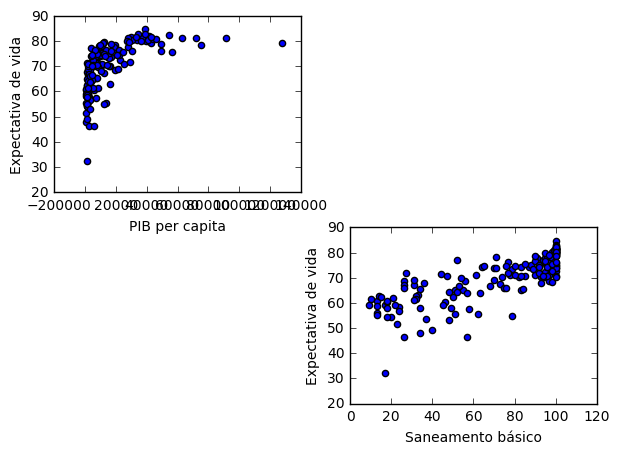

In [213]:
plt.figure(figsize=(7, 5))
plt.subplot(221)
plt.scatter(concat.PIB, concat.ExpVida)
plt.xlabel("PIB per capita")
plt.ylabel("Expectativa de vida")
plt.subplot(224)
plt.scatter(concat.SaneBas, concat.ExpVida)
plt.xlabel("Saneamento básico")
plt.ylabel("Expectativa de vida")

<p>Como podemos perceber, o griafico da expectativa de vida versus PIB per capita nos parece como uma curva logarítmica, portanto faremos uma transformação e utilizaremos a váriavel PIB per capita como o log(PIB per capita).</p>

Forma: Lin-Log


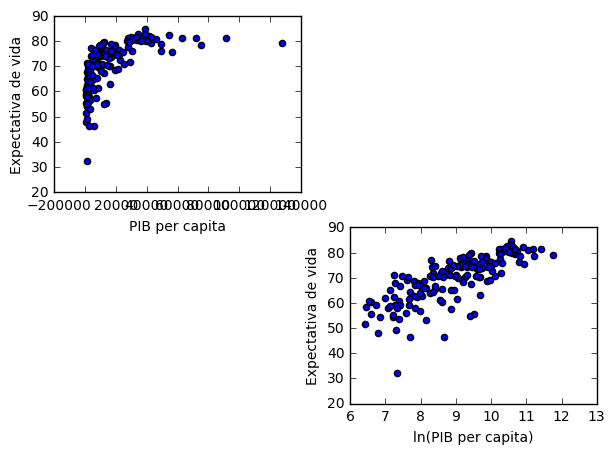

In [214]:
concat['LnPIB'] = np.log(concat['PIB'])

plt.figure(figsize=(7, 5))
plt.subplot(221)
plt.scatter(concat.PIB, concat.ExpVida)
plt.xlabel("PIB per capita")
plt.ylabel("Expectativa de vida")
plt.subplot(224)
plt.scatter(concat.LnPIB, concat.ExpVida)
plt.xlabel("ln(PIB per capita)")
plt.ylabel("Expectativa de vida")

print("Forma: Lin-Log")

In [215]:
concat.corr(method="pearson")

,ExpVida,PIB,SaneBas,LnPIB
ExpVida,1.000000,0.601182,0.794542,0.779209
PIB,0.601182,1.000000,0.574232,0.823887
SaneBas,0.794542,0.574232,1.000000,0.802649
LnPIB,0.779209,0.823887,0.802649,1.000000


<p> Esta tabela corresponde aos coeficientes de correlação, que podem variar de -1 a 1, na qual -1 corresponde a uma correlação negativa perfeita, 0 representa que as variáveis não dependem lineramente entre si e 1 representa um correlação positiva perfeita.</p>
<p>Importante percebermos que ao transformar a váriavel PIB em Logaritmo de PIB, aumentamos a nossa correlação com a váriavel expectativa de vida, o que reforça nossa tese de que há uma relação Linear-Log entre as váriaveis.</p>

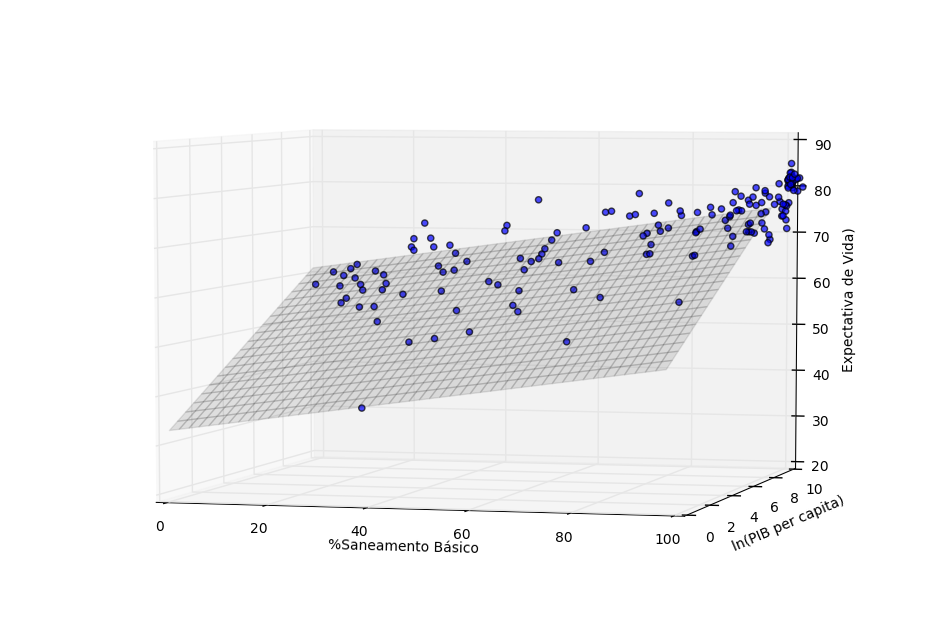

In [216]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='ExpVida ~ SaneBas + LnPIB', data = concat)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 100, 2)                # generate a mesh
y_surf = np.arange(0, 10, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'SaneBas': x_surf.ravel(), 'LnPIB': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)

ax.scatter(concat['SaneBas'], concat['LnPIB'], concat['ExpVida'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(0,100)
ax.set_ylim(0,10)
ax.set_xlabel('%Saneamento Básico')
ax.set_ylabel('ln(PIB per capita)')
ax.set_zlabel('Expectativa de Vida)')

ax.view_init(5,-75)

In [217]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=concat.ExpVida
X=concat.iloc[:,(3,4)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     177.1
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           2.13e-41
Time:                        16:23:21   Log-Likelihood:                -501.81
No. Observations:                 164   AIC:                             1010.
Df Residuals:                     161   BIC:                             1019.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         33.0433      3.798      8.700      0.000        25.542    40.544
SaneBas        0.1452      0.023      6.436      0.000         0.101     0.190
LnPIB          2.9652      0.551      5.384      0.000         1.878     4.053
==============================================================================
Omnibus:                       63.918   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.023
Skew:                          -1.523   Prob(JB):                     1.50e-46
Kurtosis:                       7.648   Cond. No.                         735.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>$y = 33.0433 + 0.1452 \ SaneBas + {2.9652 \ LogPIB}$</h1>

<h2 style="padding-right: 90%;">$R^2$</h2>

<p><span style= "padding-left: 5%;"></span>Inicialmente, de todos os parâmetros dados nas tabelas acima, podemos analisar o R quadrado ajustado, que varia entre 0% e 100% e indica o quão boa é aquela regressão. No nosso caso, é indicado o valor de 0.684 ou 68.4%, o que representa uma boa regressão. </p>

<h2>O teste F</h2>

<p><span style= "padding-left: 5%;"></span>Em segundo lugar, podemos citar o valor gerado pelo teste F. O teste F também é um indicador de qualidade da regressão feita, porém, ele utiliza um teste de hipóteses na qual considera:</p>
<ul>
    <li>Ho: Os coeficientes da regressão feita são iguais a zero, portanto, o modelo é ruim</li>
    <li>Ha: Ao menos um coeficiente da regressão é diferente de zero</li>
</ul>
<p><span style= "padding-left: 5%;"></span>Assim, caso nosso valor de f dê menor que o p-value considerado, podemos rejeitar a Hipótese Nula, e assim, confirmar que o modelo realmente é utilizável</p>

<p><span style= "padding-left: 5%;"></span>Como visto acima, o nosso valor de probabilidade F retirado diretamente da tabela anterior(2.13 x $10^{-41}$), é muito menor que o p-value da distribuição(5%), portanto, como dito antes, rejeitamos a hipótese nula e provamos que a regressão é aplicável.</p>

<h2>O teste t</h2>

<p><span style="padding-left: 5%;"></span>O teste t apresentado na segunda tabela acima, também avalia quão bom é a nossa regressão. Porém, através do teste t conseguimos avaliar cada variável. Sendo assim, por meio de um teste de hipótese, o resultado do teste t para cada variável nos dira se esta influência em nossa variável resposta ou não. O teste de hipótese segue assim:</p>
<ul>
    <li>Ho: O coeficiente da relação variável Resposta-Explicativa é zero, portanto, a variável não oferece nenhuma relação de previsão na outra.</li>
    <li>Ha: O coeficiente da relação é diferente de zero, portanto, influencia na regressão</li>
</ul>
<p><span style="padding-left: 5%;"></span>Assim, caso o nosso valor de t de abaixo do p-value, rejeitamos a hipótese nula, portanto, assumimos que a váriavel influencia na regressão.</p>

In [219]:
print("Valores t das váriaveis da regressão:")
print(fit.tvalues)

Valores t das váriaveis da regressão:
const      8.699596
SaneBas    6.436087
LnPIB      5.384150
dtype: float64


<h3>Porcentagem de Saneamento Básico (por pessoa)</h3>

<p>Quando analisamos o teste t da váriavel Porcentagem de Saneamento Básico, temos:</p>

In [220]:
print("T(SaneBas): {:.3f}, p-value: 0.5".format(fit.tvalues[1]))

T(SaneBas): 6.436, p-value: 0.5


<p>Como vemos acima, o nosso valor de T para saneamento básico é maior que o p-value, portanto, rejeitamos a hipótese nula, assim, assumimos que a Porcentagem de Saneamento básico por pessoa influencia na regressão.</p>

<h3>Log PIB per capita</h3>

In [221]:
print("T(LnPIB): {:.3f}, p-value: 0.5".format(fit.tvalues[2]))

T(LnPIB): 5.384, p-value: 0.5


<p>Assim como no caso do saneamento básico, o valor T para o logarítmo de PIB é maior que o p-value, rejeitamos a hipótese nula, assim. assumimos que o logarítmo do PIB per capita interfere na nossa regressão.</p>

<h2>Resíduos</h2>

<h3>Durbin-Watson</h3>

<p><span style="padding-left: 5%;"></span>O teste de estatística Durbin-Watson checa a autocorrelação entre os erros da regressão. Isto nos interessa, pois antes de efetuar a regressão, supomos que:</p>
<ol>
    <li>Os erros são independentes e idênticamente distribuidos.</li>
</ol>
<p>Sabendo que o teste de Durbin-Watson é um coeficiente que varia de 0 à 4 e que:</p>
<ul>
    <li>Valores entorno de 2 significam que não há correlação entre os resíduos.</li>
    <li>Valores próximos de 4 significam uma relação negativa.</li>
    <li>Valores próximos de 0 siginificam uma relação positiva </li>
</ul>

<p><span style="padding-left: 5%;"></span>Assim, pela nossa tabela, vemos que nosso valor do teste Durbin-Watson é de aproximadamente 1.8, o que representa o caso em que não há correlação entre os resíduos, portanto, confirmando nossas suposições iniciais.</p>

<h3>Omnibus</h3>

<p>O coeficiente de Omnibus determina a normalidade da distribuição dos erros, inclusive, tendo essa normal uma média igual a 0. sendo assim, Omnibus, através de um teste de hipótese, define:</p>
<ul>
    <li>Ho: Os erros não seguem uma normal e não tem média 0.</li>
    <li>Ha: Os erros seguem uma normal e tem média 0.</li>
</ul>
<p>Portanto, através de nossa tabela, vemos que a Pr(Omnibus) é tão pequena que se aproxima de 0. Portanto, sendo menor que nosso p-value de 5%, rejeitamos nossa hipótese nula, afirmando nossa suposição de resíduos normalizados e com média igual a 0.</p>

<h1>Considerando um sub-grupo diferente para nossa regressão, analisaremos a aplicabilidade desta relação de variáveis para um grupo determinado.</h1>

<h3>Grupo com as menores expectativas de vida</h3>

In [240]:
concat_menor = concat[concat.ExpVida < 55]

In [242]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=concat_menor.ExpVida
X=concat_menor.iloc[:,(3,4)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.131
Date:                Tue, 06 Dec 2016   Prob (F-statistic):              0.369
Time:                        17:36:14   Log-Likelihood:                -34.422
No. Observations:                  11   AIC:                             74.84
Df Residuals:                       8   BIC:                             76.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         79.2007     29.672      2.669      0.028        10.776   147.625
SaneBas        0.3233      0.219      1.475      0.178        -0.182     0.829
LnPIB         -5.4815      4.795     -1.143      0.286       -16.539     5.576
==============================================================================
Omnibus:                        1.937   Durbin-Watson:                   3.067
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                0.694
Skew:                          -0.615   Prob(JB):                        0.707
Kurtosis:                       3.015   Cond. No.                         634.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<p>Através da mesma análise que fizemos anteriormente, observamos que a regressão para aqueles países com menor expectativa de vida não é tão boa quanto para os países no geral.</p>

<h1>Conclusão</h1>

<p>Retomando, a questão a ser respondida neste artigo é: O PIB e a porcentagem da população que tem saneamento básico influenciam na expectativa de vida de quem vive neste país?.</p>
<p>Assim, através da nossa regressão, concluimos que sim, a porcentagem de saneamento básico e o PIB de um país influenciam em sua expectativa de vida.</p>